# EDA & Baselines
Use this notebook to explore OHLCV data quality, visualize feature distributions, and sanity‑check labels.

In [1]:
!pip install -q yfinance


In [2]:
import sys
# install project deps + Yahoo Finance into THIS kernel
!{sys.executable} -m pip install -q -r ../requirements.txt yfinance


In [3]:
import os
os.chdir("/Users/rosaliemassein/Documents/stanford/Autumn 2025/CS229/Project/cs229-sentiment-vs-tech-starter")
print("CWD:", os.getcwd())



CWD: /Users/rosaliemassein/Documents/stanford/Autumn 2025/CS229/Project/cs229-sentiment-vs-tech-starter


In [4]:
import os
os.environ["PYTHONPATH"] = os.getcwd()
print("PYTHONPATH:", os.environ["PYTHONPATH"])


PYTHONPATH: /Users/rosaliemassein/Documents/stanford/Autumn 2025/CS229/Project/cs229-sentiment-vs-tech-starter


In [5]:
import sys
!{sys.executable} -m pip install -q -r requirements.txt yfinance

!PYTHONPATH=. python scripts/fetch_ohlcv.py --config configs/default.yaml
!PYTHONPATH=. python scripts/build_technical_features.py --config configs/default.yaml


Saved data/raw/ohlcv_AAPL.csv (1972 rows)
Saved data/raw/ohlcv_TSLA.csv (1972 rows)
Saved data/raw/ohlcv_MSFT.csv (1972 rows)
Saved data/raw/ohlcv_SPY.csv (1972 rows)
Saved data/raw/ohlcv_NVDA.csv (1972 rows)
Saved data/raw/ohlcv_GOOG.csv (1972 rows)
Saved data/raw/ohlcv_AMZN.csv (1972 rows)
Saved data/raw/ohlcv_META.csv (1972 rows)
Saved data/raw/ohlcv_NFLX.csv (1972 rows)
Saved data/raw/ohlcv_AMD.csv (1972 rows)
Saved data/processed/technical_only.csv


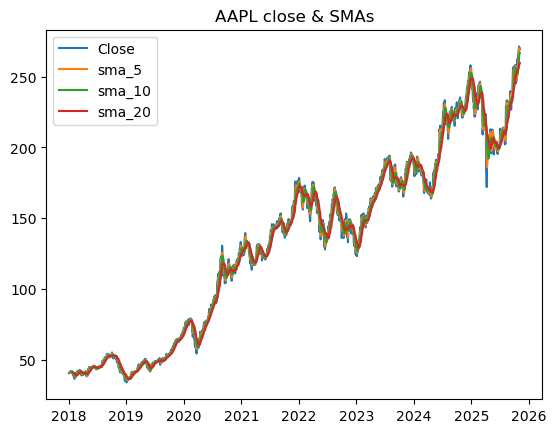

In [6]:
import pandas as pd, matplotlib.pyplot as plt
df = pd.read_csv("data/processed/technical_only.csv", parse_dates=["date"]).sort_values("date")
t = "AAPL"; d = df[df["ticker"]==t]
plt.plot(d["date"], d["close"], label="Close")
for col in ["sma_5","sma_10","sma_20"]:
    if col in d: plt.plot(d["date"], d[col], label=col)
plt.legend(); plt.title(f"{t} close & SMAs"); plt.show()


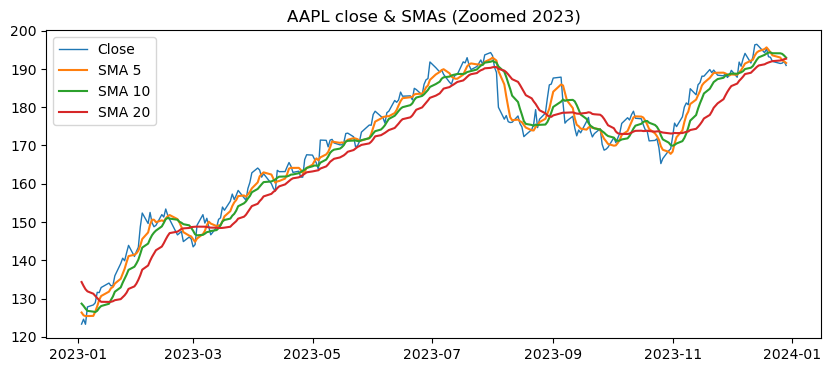

In [7]:
plt.figure(figsize=(10,4))
subset = d[d["date"].between("2023-01-01", "2024-01-01")]
plt.plot(subset["date"], subset["close"], label="Close", linewidth=1)
plt.plot(subset["date"], subset["sma_5"], label="SMA 5")
plt.plot(subset["date"], subset["sma_10"], label="SMA 10")
plt.plot(subset["date"], subset["sma_20"], label="SMA 20")
plt.title("AAPL close & SMAs (Zoomed 2023)")
plt.legend(); plt.show()


In [8]:
import sys
!{sys.executable} -m pip install -q yfinance


In [9]:
import shutil, os
for p in ["data/raw", "data/processed"]:
    if os.path.isdir(p):
        shutil.rmtree(p)
os.makedirs("data/raw", exist_ok=True)
os.makedirs("data/processed", exist_ok=True)


In [10]:
import os
os.environ["PYTHONPATH"] = os.getcwd()
!python scripts/fetch_ohlcv.py --config configs/default.yaml
!python scripts/build_technical_features.py --config configs/default.yaml


Saved data/raw/ohlcv_AAPL.csv (1972 rows)
Saved data/raw/ohlcv_TSLA.csv (1972 rows)
Saved data/raw/ohlcv_MSFT.csv (1972 rows)
Saved data/raw/ohlcv_SPY.csv (1972 rows)
Saved data/raw/ohlcv_NVDA.csv (1972 rows)
Saved data/raw/ohlcv_GOOG.csv (1972 rows)
Saved data/raw/ohlcv_AMZN.csv (1972 rows)
Saved data/raw/ohlcv_META.csv (1972 rows)
Saved data/raw/ohlcv_NFLX.csv (1972 rows)
Saved data/raw/ohlcv_AMD.csv (1972 rows)
Saved data/processed/technical_only.csv


In [11]:
import pandas as pd, glob
paths = glob.glob("data/raw/ohlcv_*.csv")
for p in paths:
    df = pd.read_csv(p, nrows=3)  # small sniff
    print(p, "dtypes:", dict(df.dtypes))


data/raw/ohlcv_MSFT.csv dtypes: {'date': dtype('O'), 'ticker': dtype('O'), 'open': dtype('O'), 'high': dtype('O'), 'low': dtype('O'), 'close': dtype('O'), 'volume': dtype('O')}
data/raw/ohlcv_NVDA.csv dtypes: {'date': dtype('O'), 'ticker': dtype('O'), 'open': dtype('O'), 'high': dtype('O'), 'low': dtype('O'), 'close': dtype('O'), 'volume': dtype('O')}
data/raw/ohlcv_AMZN.csv dtypes: {'date': dtype('O'), 'ticker': dtype('O'), 'open': dtype('O'), 'high': dtype('O'), 'low': dtype('O'), 'close': dtype('O'), 'volume': dtype('O')}
data/raw/ohlcv_SPY.csv dtypes: {'date': dtype('O'), 'ticker': dtype('O'), 'open': dtype('O'), 'high': dtype('O'), 'low': dtype('O'), 'close': dtype('O'), 'volume': dtype('O')}
data/raw/ohlcv_AAPL.csv dtypes: {'date': dtype('O'), 'ticker': dtype('O'), 'open': dtype('O'), 'high': dtype('O'), 'low': dtype('O'), 'close': dtype('O'), 'volume': dtype('O')}
data/raw/ohlcv_AMD.csv dtypes: {'date': dtype('O'), 'ticker': dtype('O'), 'open': dtype('O'), 'high': dtype('O'), 'l

In [12]:
!python scripts/fetch_ohlcv.py --config configs/default.yaml
!python scripts/build_technical_features.py --config configs/default.yaml


Saved data/raw/ohlcv_AAPL.csv (1972 rows)
Saved data/raw/ohlcv_TSLA.csv (1972 rows)
Saved data/raw/ohlcv_MSFT.csv (1972 rows)
Saved data/raw/ohlcv_SPY.csv (1972 rows)
Saved data/raw/ohlcv_NVDA.csv (1972 rows)
Saved data/raw/ohlcv_GOOG.csv (1972 rows)
Saved data/raw/ohlcv_AMZN.csv (1972 rows)
Saved data/raw/ohlcv_META.csv (1972 rows)
Saved data/raw/ohlcv_NFLX.csv (1972 rows)
Saved data/raw/ohlcv_AMD.csv (1972 rows)
Saved data/processed/technical_only.csv


In [13]:
import pandas as pd
df = pd.read_csv("data/processed/technical_only.csv", parse_dates=["date"]).sort_values("date")
df.dtypes  # confirm numeric types
df.head()


,date,ticker,open,high,low,close,volume,ret_1d,sma_5,mom_5,sma_10,mom_10,sma_20,mom_20,vol_20,rsi,y
0,2018-01-02,MSFT,86.129997,86.309998,85.500000,79.198341,22483800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
15784,2018-01-02,META,177.679993,181.580002,177.550003,180.308441,18151900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
13811,2018-01-02,TSLA,20.799999,21.474001,20.733334,21.368668,65283000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1973,2018-01-02,NVDA,4.894500,4.987500,4.862500,4.928807,355616000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
5919,2018-01-02,SPY,267.839996,268.809998,267.399994,237.909103,86655700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [14]:
import pandas as pd

df = pd.read_csv("data/processed/technical_only.csv", parse_dates=["date"]).sort_values(["ticker","date"])

# last 5 rows for each ticker
tail_per_ticker = (df.groupby("ticker", group_keys=True)
                     .apply(lambda g: g.tail(5))
                     .reset_index(drop=True))
tail_per_ticker


/var/folders/b_/mlsl2ls12tv6tnhpgltb9vnc0000gn/T/ipykernel_10446/354160735.py:6: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tail_per_ticker = (df.groupby("ticker", group_keys=True)


,date,ticker,open,high,low,close,volume,ret_1d,sma_5,mom_5,sma_10,mom_10,sma_20,mom_20,vol_20,rsi,y
0,2025-10-29,AAPL,269.279999,271.410004,267.109985,269.700012,51086700.0,0.002602,265.982001,0.043529,261.310999,0.081656,257.178500,0.055784,0.244341,67.163565,1
1,2025-10-30,AAPL,271.989990,274.140015,268.480011,271.399994,69886500.0,0.006303,268.346002,0.045535,263.705998,0.096787,257.891999,0.055497,0.244288,83.891088,0
2,2025-10-31,AAPL,276.989990,277.320007,269.160004,270.369995,86167100.0,-0.003795,269.856000,0.028727,265.513998,0.071664,258.509499,0.047865,0.245389,80.532438,0
3,2025-11-03,AAPL,270.420013,270.850006,266.250000,269.049988,50194600.0,-0.004882,269.903998,0.000893,266.194998,0.025969,259.127499,0.048151,0.245279,77.708349,1
4,2025-11-04,AAPL,268.329987,271.489990,267.619995,270.040009,49274800.0,0.003680,270.112000,0.003866,266.922000,0.027667,259.805499,0.052870,0.244999,77.366506,0
5,2025-10-29,AMD,264.190002,267.079987,257.399994,264.329987,49335600.0,0.024495,253.984003,0.148113,244.638000,0.107837,227.623000,0.611670,1.057334,65.345559,0
6,2025-10-30,AMD,259.920013,263.880005,252.309998,254.839996,45162500.0,-0.035902,257.954001,0.084472,246.666000,0.086460,231.878500,0.501443,1.079153,71.258251,1
7,2025-10-31,AMD,259.600006,262.130005,253.410004,256.119995,34449200.0,0.005023,258.594000,0.012652,248.970000,0.098850,236.450999,0.555353,1.063710,71.184631,1
8,2025-11-03,AMD,259.329987,260.910004,253.889999,259.649994,36351400.0,0.013783,258.589996,-0.000077,250.878999,0.079356,239.247999,0.274606,0.706626,71.745499,0
9,2025-11-04,AMD,250.350006,257.380005,247.389999,250.050003,56491800.0,-0.036973,256.997995,-0.030852,252.081000,0.050498,241.174999,0.182214,0.721423,56.763142,0


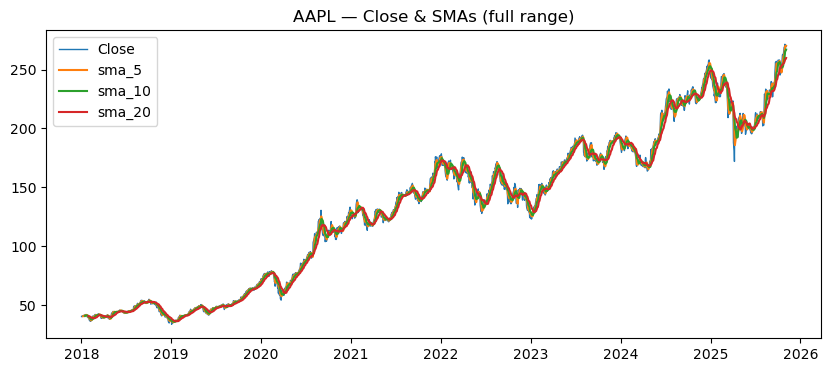

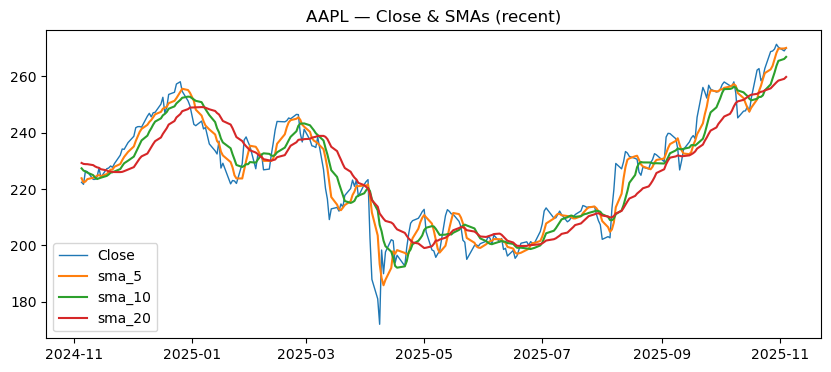

In [15]:
import matplotlib.pyplot as plt

aapl = df[df["ticker"]=="AAPL"].sort_values("date")

# full range
plt.figure(figsize=(10,4))
plt.plot(aapl["date"], aapl["close"], label="Close", linewidth=1)
for col in ["sma_5","sma_10","sma_20"]:
    if col in aapl: plt.plot(aapl["date"], aapl[col], label=col)
plt.title("AAPL — Close & SMAs (full range)")
plt.legend(); plt.show()

# zoom into the most recent ~250 trading days (~1 year)
recent = aapl.tail(250)
plt.figure(figsize=(10,4))
plt.plot(recent["date"], recent["close"], label="Close", linewidth=1)
for col in ["sma_5","sma_10","sma_20"]:
    if col in recent: plt.plot(recent["date"], recent[col], label=col)
plt.title("AAPL — Close & SMAs (recent)")
plt.legend(); plt.show()


In [16]:
df = pd.read_csv("data/processed/technical_only.csv", parse_dates=["date"])
df = df.sort_values(["ticker", "date"])

train_df = df[df["date"] < "2024-01-01"]
test_df  = df[df["date"] >= "2024-01-01"]

X_train, y_train = train_df.drop(columns=["y"]), train_df["y"]
X_test,  y_test  = test_df.drop(columns=["y"]),  test_df["y"]


In [17]:
import os, numpy as np, pandas as pd
os.environ["PYTHONPATH"] = os.getcwd()

from scripts.LogisticRegression import LogisticRegression, add_intercept

# Load and prepare data
df = pd.read_csv("data/processed/technical_only.csv", parse_dates=["date"]).sort_values(["ticker","date"])

feat_cols = [c for c in df.columns if c.startswith(("sma_","mom_","vol_","rsi"))] + ["ret_1d"]

# Drop warm-up NaNs per ticker
def drop_warmup(g):
    return g.dropna(subset=feat_cols + ["y"])
clean = df.groupby("ticker", group_keys=False).apply(drop_warmup)

# Chronological split
train = clean[clean["date"] < "2024-01-01"]
test  = clean[clean["date"] >= "2024-01-01"]

Xtr = train[feat_cols].to_numpy(float)
Xte = test [feat_cols].to_numpy(float)
ytr = train["y"].to_numpy(int)
yte = test ["y"].to_numpy(int)

# Add intercept
Xtr = add_intercept(Xtr)
Xte = add_intercept(Xte)

# Train (set verbose=False if you want a quiet run; l2>0 for regularization)
clf = LogisticRegression(max_iter=200, eps=1e-6, verbose=True, l2=0.0)
clf.fit(Xtr, ytr)

# Evaluate
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

p = clf.predict_proba(Xte)
yhat = (p >= 0.5).astype(int)

print("Test Accuracy:", accuracy_score(yte, yhat))
print("Test ROC AUC :", roc_auc_score(yte, p))
print(classification_report(yte, yhat, digits=3))

# Save model (optional)
# clf.save("models/logreg_baseline.npz", feature_names=["(intercept)"] + feat_cols)


/var/folders/b_/mlsl2ls12tv6tnhpgltb9vnc0000gn/T/ipykernel_10446/1321098960.py:14: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  clean = df.groupby("ticker", group_keys=False).apply(drop_warmup)


iter   0 | step_L1 4.105e+00 | avg_loglik -0.693147
iter   3 | step_L1 4.240e-14 | avg_loglik -0.690309
Test Accuracy: 0.532829373650108
Test ROC AUC : 0.517975726012092
              precision    recall  f1-score   support

           0      0.490     0.301     0.373      2136
           1      0.550     0.731     0.628      2494

    accuracy                          0.533      4630
   macro avg      0.520     0.516     0.500      4630
weighted avg      0.522     0.533     0.510      4630



In [18]:
from scripts.LogisticRegression import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
import pandas as pd, numpy as np

lambdas = [0.0, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
results = []

for lam in lambdas:
    clf = LogisticRegression(max_iter=200, eps=1e-6, verbose=False, l2=lam)
    clf.fit(Xtr, ytr)
    p = clf.predict_proba(Xte)
    auc = roc_auc_score(yte, p)
    acc = accuracy_score(yte, (p >= 0.5).astype(int))
    results.append({"lambda": lam, "AUC": auc, "Acc": acc})

res = pd.DataFrame(results)
print(res.sort_values("AUC", ascending=False))


     lambda       AUC       Acc
3  0.000100  0.519061  0.531749
2  0.000010  0.518271  0.531317
1  0.000001  0.518015  0.533045
0  0.000000  0.517976  0.532829
4  0.001000  0.516938  0.532829
5  0.010000  0.514032  0.526566


In [19]:
import os
os.environ["PYTHONPATH"] = os.getcwd()
!python scripts/make_labels.py --input data/processed/technical_only.csv --horizon_days 5 --threshold 0.0 --out data/processed/technical_only_h5.csv


Saved data/processed/technical_only_h5.csv with label column 'y_h5'


In [20]:
import os, numpy as np, pandas as pd
os.environ["PYTHONPATH"] = os.getcwd()

from scripts.LogisticRegression import LogisticRegression, add_intercept

# 1) Load the H=5 dataset
df = pd.read_csv("data/processed/technical_only_h5.csv", parse_dates=["date"])\
       .sort_values(["ticker","date"])

# 2) Features: same technical indicators as before (do NOT include any forward-return columns)
feat_cols = [c for c in df.columns if c.startswith(("sma_","mom_","vol_","rsi"))] + ["ret_1d"]

# 3) Drop warm-up NaNs per ticker (now using the y_h5 label)
def drop_warmup(g):
    return g.dropna(subset=feat_cols + ["y_h5"])

clean = df.groupby("ticker", group_keys=False).apply(drop_warmup)

# 4) Chronological split (same date cut as before)
train = clean[clean["date"] < "2024-01-01"]
test  = clean[clean["date"] >= "2024-01-01"]

Xtr = train[feat_cols].to_numpy(float)
Xte = test [feat_cols].to_numpy(float)
ytr = train["y_h5"].to_numpy(int)
yte = test ["y_h5"].to_numpy(int)

# 5) Add intercept
Xtr = add_intercept(Xtr)
Xte = add_intercept(Xte)

# 6) Train (you can set l2=1e-3 for mild regularization; here 0.0 to match your earlier run)
clf = LogisticRegression(max_iter=200, eps=1e-6, verbose=True, l2=0.0)
clf.fit(Xtr, ytr)

# 7) Evaluate
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

p = clf.predict_proba(Xte)
yhat = (p >= 0.5).astype(int)

print("Test Accuracy:", accuracy_score(yte, yhat))
print("Test ROC AUC :", roc_auc_score(yte, p))
print(classification_report(yte, yhat, digits=3))

#8) (Optional) Save model
from pathlib import Path
Path("models").mkdir(exist_ok=True)
clf.save("models/logreg_baseline_h5.npz", feature_names=["(intercept)"] + feat_cols)


iter   0 | step_L1 3.642e+00 | avg_loglik -0.693147
iter   3 | step_L1 5.698e-12 | avg_loglik -0.681898
Test Accuracy: 0.551528384279476
Test ROC AUC : 0.507170996058198
              precision    recall  f1-score   support

           0      0.424     0.213     0.284      1908
           1      0.585     0.793     0.674      2672

    accuracy                          0.552      4580
   macro avg      0.505     0.503     0.479      4580
weighted avg      0.518     0.552     0.511      4580



/var/folders/b_/mlsl2ls12tv6tnhpgltb9vnc0000gn/T/ipykernel_10446/1986447659.py:17: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  clean = df.groupby("ticker", group_keys=False).apply(drop_warmup)


In [21]:
print("Train y_h5 mean (fraction of 1s):", ytr.mean().round(3))
print("Test  y_h5 mean (fraction of 1s):", yte.mean().round(3))


Train y_h5 mean (fraction of 1s): 0.567
Test  y_h5 mean (fraction of 1s): 0.583


In [22]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from scripts.LogisticRegression import LogisticRegression, add_intercept

# Rebuild design matrices from your existing train/test DataFrames
Xtr_raw = train[feat_cols].to_numpy(float)
Xte_raw = test [feat_cols].to_numpy(float)
ytr = train["y_h5"].to_numpy(int)
yte = test ["y_h5"].to_numpy(int)

# Standardize (fit on train, apply to test)
scaler = StandardScaler()
Xtr = scaler.fit_transform(Xtr_raw)
Xte = scaler.transform(Xte_raw)

# Add intercept
Xtr = add_intercept(Xtr)
Xte = add_intercept(Xte)

lambdas = [0.0, 1e-3, 1e-2]  # tiny sweep
for lam in lambdas:
    clf = LogisticRegression(max_iter=200, eps=1e-6, verbose=False, l2=lam)
    clf.fit(Xtr, ytr)
    p = clf.predict_proba(Xte)
    yhat = (p >= 0.5).astype(int)
    print(f"\nL2={lam:g}")
    print("  Test AUC :", roc_auc_score(yte, p))
    print("  Accuracy :", accuracy_score(yte, yhat))
    print(classification_report(yte, yhat, digits=3))



L2=0
  Test AUC : 0.507170996058198
  Accuracy : 0.551528384279476
              precision    recall  f1-score   support

           0      0.424     0.213     0.284      1908
           1      0.585     0.793     0.674      2672

    accuracy                          0.552      4580
   macro avg      0.505     0.503     0.479      4580
weighted avg      0.518     0.552     0.511      4580


L2=0.001
  Test AUC : 0.5082233332077982
  Accuracy : 0.5491266375545851
              precision    recall  f1-score   support

           0      0.417     0.208     0.278      1908
           1      0.584     0.793     0.672      2672

    accuracy                          0.549      4580
   macro avg      0.501     0.500     0.475      4580
weighted avg      0.514     0.549     0.508      4580


L2=0.01
  Test AUC : 0.5081886149085477
  Accuracy : 0.5478165938864629
              precision    recall  f1-score   support

           0      0.416     0.210     0.279      1908
           1      0.58

In [23]:
coef_df = pd.DataFrame({
    "feature": ["(intercept)"] + feat_cols,
    "theta": clf.theta
}).sort_values("theta", ascending=False)
print(coef_df.head(10))
print(coef_df.tail(10))


       feature     theta
0  (intercept)  0.259011
4       mom_10  0.034219
8          rsi  0.006802
6       mom_20 -0.003858
5       sma_20 -0.028165
9       ret_1d -0.030124
3       sma_10 -0.032071
2        mom_5 -0.037238
1        sma_5 -0.044124
7       vol_20 -0.092523
       feature     theta
0  (intercept)  0.259011
4       mom_10  0.034219
8          rsi  0.006802
6       mom_20 -0.003858
5       sma_20 -0.028165
9       ret_1d -0.030124
3       sma_10 -0.032071
2        mom_5 -0.037238
1        sma_5 -0.044124
7       vol_20 -0.092523


# Sentiments

In [24]:
import os
os.chdir("/Users/rosaliemassein/Documents/stanford/Autumn 2025/CS229/Project/cs229-sentiment-vs-tech-starter")
print("CWD:", os.getcwd())


CWD: /Users/rosaliemassein/Documents/stanford/Autumn 2025/CS229/Project/cs229-sentiment-vs-tech-starter


In [25]:
import os
os.environ["PYTHONPATH"] = os.getcwd()
print("PYTHONPATH:", os.environ["PYTHONPATH"])

PYTHONPATH: /Users/rosaliemassein/Documents/stanford/Autumn 2025/CS229/Project/cs229-sentiment-vs-tech-starter


In [26]:
# Headlines → 1D score
!python scripts/build_headline_sentiment.py \
  --input data/raw/news/headlines.csv \
  --encoder score \
  --out data/processed/sent_headlines_score.csv

# Headlines → 3 probs (pos/neu/neg)
!python scripts/build_headline_sentiment.py \
  --input data/raw/news/headlines.csv \
  --encoder triplet \
  --out data/processed/sent_headlines_triplet.csv

# Headlines → 16-d embedding (CLS → PCA16)
!python scripts/build_headline_sentiment.py \
  --input data/raw/news/headlines.csv \
  --encoder embed_pca16 \
  --out data/processed/sent_headlines_embed_pca16.csv


Traceback (most recent call last):
  File "/Users/rosaliemassein/Documents/stanford/Autumn 2025/CS229/Project/cs229-sentiment-vs-tech-starter/scripts/build_headline_sentiment.py", line 174, in <module>
    main()
  File "/Users/rosaliemassein/Documents/stanford/Autumn 2025/CS229/Project/cs229-sentiment-vs-tech-starter/scripts/build_headline_sentiment.py", line 112, in main
    df = pd.read_csv(args.input, parse_dates=["date"])
  File "/Users/rosaliemassein/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py", line 311, in wrapper
    return func(*args, **kwargs)
  File "/Users/rosaliemassein/opt/anaconda3/lib/python3.9/site-packages/pandas/io/parsers/readers.py", line 680, in read_csv
    return _read(filepath_or_buffer, kwds)
  File "/Users/rosaliemassein/opt/anaconda3/lib/python3.9/site-packages/pandas/io/parsers/readers.py", line 575, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
  File "/Users/rosaliemassein/opt/anaconda3/lib/python3.9/site-packa

In [27]:
!pip install -q yfinance --upgrade


In [28]:
import os
os.environ["PYTHONPATH"] = os.getcwd()

# Using dates/tickers from configs/default.yaml
!python scripts/fetch_headlines.py --config configs/default.yaml --out data/raw/news/headlines.csv

# (Optional) override
# !python scripts/fetch_headlines.py --config configs/default.yaml \
#       --start 2023-01-01 --end 2025-01-01 \
#       --tickers AAPL,MSFT,TSLA,SPY \
#       --out data/raw/news/headlines.csv


[warn] feedparser non installé -> fallback Google News désactivé
[info] AAPL: kept 1
[warn] feedparser non installé -> fallback Google News désactivé
[info] TSLA: kept 1
[warn] feedparser non installé -> fallback Google News désactivé
[info] MSFT: kept 1
[info] SPY: kept 7
[warn] feedparser non installé -> fallback Google News désactivé
[info] NVDA: kept 1
[warn] feedparser non installé -> fallback Google News désactivé
[info] GOOG: kept 0
[warn] feedparser non installé -> fallback Google News désactivé
[info] AMZN: kept 1
[warn] feedparser non installé -> fallback Google News désactivé
[info] META: kept 0
[info] NFLX: kept 5
[warn] feedparser non installé -> fallback Google News désactivé
[info] AMD: kept 1
[ok] wrote data/raw/news/headlines.csv | rows=18


In [29]:
# In a notebook cell
%cd "/Users/rosaliemassein/Documents/stanford/Autumn 2025/CS229/Project/cs229-sentiment-vs-tech-starter"
%env PYTHONPATH=.
!python scripts/fetch_headlines.py --config configs/default.yaml --start 2023-01-01 --end 2025-10-20 --tickers AAPL,MSFT,TSLA,SPY --out data/raw/news/headlines.csv


/Users/rosaliemassein/Documents/stanford/Autumn 2025/CS229/Project/cs229-sentiment-vs-tech-starter
env: PYTHONPATH=.
[warn] feedparser non installé -> fallback Google News désactivé
[info] AAPL: kept 0
[warn] feedparser non installé -> fallback Google News désactivé
[info] MSFT: kept 0
[warn] feedparser non installé -> fallback Google News désactivé
[info] TSLA: kept 0
[warn] feedparser non installé -> fallback Google News désactivé
[info] SPY: kept 0
[ok] wrote data/raw/news/headlines.csv | rows=0


In [30]:
%cd "/Users/rosaliemassein/Documents/stanford/Autumn 2025/CS229/Project/cs229-sentiment-vs-tech-starter"
%env PYTHONPATH=.



/Users/rosaliemassein/Documents/stanford/Autumn 2025/CS229/Project/cs229-sentiment-vs-tech-starter
env: PYTHONPATH=.


In [31]:
import json, textwrap, yfinance as yf

raw = yf.Ticker("AAPL").news or []
print("items =", len(raw))
if raw:
    print("type(content) =", type(raw[0].get("content")))
    print(textwrap.shorten(str(raw[0].get("content")), width=300, placeholder="..."))


items = 10
type(content) = <class 'dict'>
{'id': 'b1bd5b6f-ad12-430b-b6ed-2670d6e4a5d0', 'contentType': 'STORY', 'title': 'Apple could make $133 billion a year on humanoid robots by 2040: Morgan Stanley', 'description': '', 'summary': 'Morgan Stanley predicts Apple could generated $133 billion a year from humanoid robots by the year...


In [32]:
# Writes scripts/merge_features.py
from pathlib import Path
code = r"""#!/usr/bin/env python
import argparse, os
import pandas as pd

def main(tech_path, out_path, sent_path=None, label_col="y_h5"):
    # Load technical features (+ labels)
    tech = pd.read_csv(tech_path, parse_dates=["date"]).sort_values(["ticker","date"])

    # Basic sanity
    if "ticker" not in tech.columns or "date" not in tech.columns:
        raise ValueError(f"{tech_path} must contain 'date' and 'ticker' columns")
    if label_col not in tech.columns:
        raise ValueError(f"Label column '{label_col}' not found in {tech_path}")

    merged = tech.copy()

    # Optionally bring in sentiment features
    if sent_path:
        sent = pd.read_csv(sent_path, parse_dates=["date"]).sort_values(["ticker","date"])
        if "ticker" not in sent.columns or "date" not in sent.columns:
            raise ValueError(f"{sent_path} must contain 'date' and 'ticker' columns")
        # Determine sentiment feature columns (everything except keys)
        sent_feat_cols = [c for c in sent.columns if c not in ("date","ticker")]
        if len(sent_feat_cols) == 0:
            print(f"[warn] No sentiment columns found in {sent_path}; performing a no-op merge.")
        merged = pd.merge(
            merged,
            sent[["date","ticker"] + sent_feat_cols],
            on=["date","ticker"],
            how="left",
            validate="m:1"
        )

    # Write
    os.makedirs(os.path.dirname(out_path), exist_ok=True)
    merged.to_csv(out_path, index=False)
    print(f"[ok] wrote {out_path} | rows={len(merged)} | cols={len(merged.columns)}")

if __name__ == "__main__":
    ap = argparse.ArgumentParser()
    ap.add_argument("--tech", required=True, help="CSV with technical features and labels (must include date,ticker,label)")
    ap.add_argument("--sent", default=None, help="CSV with sentiment features (must include date,ticker)")
    ap.add_argument("--out", required=True, help="Output CSV")
    ap.add_argument("--label_col", default="y_h5", help="Name of label column to keep/check (default: y_h5)")
    args = ap.parse_args()
    main(args.tech, args.out, args.sent, args.label_col)
"""
Path("scripts").mkdir(parents=True, exist_ok=True)
Path("scripts/merge_features.py").write_text(code)
print("Wrote scripts/merge_features.py")


Wrote scripts/merge_features.py


In [33]:
%env PYTHONPATH=.

# T-only baseline
!python scripts/merge_features.py \
  --tech data/processed/technical_only_h5.csv \
  --out  data/processed/merge_T_only_h5.csv \
  --label_col y_h5

# T + Score
!python scripts/merge_features.py \
  --tech data/processed/technical_only_h5.csv \
  --sent data/processed/sent_headlines_score.csv \
  --out  data/processed/merge_TS_score_h5.csv \
  --label_col y_h5

# T + Triplet
!python scripts/merge_features.py \
  --tech data/processed/technical_only_h5.csv \
  --sent data/processed/sent_headlines_triplet.csv \
  --out  data/processed/merge_TS_triplet_h5.csv \
  --label_col y_h5

# T + Embed-PCA16
!python scripts/merge_features.py \
  --tech data/processed/technical_only_h5.csv \
  --sent data/processed/sent_headlines_embed_pca16.csv \
  --out  data/processed/merge_TS_embed_pca16_h5.csv \
  --label_col y_h5


env: PYTHONPATH=.
[ok] wrote data/processed/merge_T_only_h5.csv | rows=19670 | cols=19
Traceback (most recent call last):
  File "/Users/rosaliemassein/Documents/stanford/Autumn 2025/CS229/Project/cs229-sentiment-vs-tech-starter/scripts/merge_features.py", line 46, in <module>
    main(args.tech, args.out, args.sent, args.label_col)
  File "/Users/rosaliemassein/Documents/stanford/Autumn 2025/CS229/Project/cs229-sentiment-vs-tech-starter/scripts/merge_features.py", line 19, in main
    sent = pd.read_csv(sent_path, parse_dates=["date"]).sort_values(["ticker","date"])
  File "/Users/rosaliemassein/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py", line 311, in wrapper
    return func(*args, **kwargs)
  File "/Users/rosaliemassein/opt/anaconda3/lib/python3.9/site-packages/pandas/io/parsers/readers.py", line 680, in read_csv
    return _read(filepath_or_buffer, kwds)
  File "/Users/rosaliemassein/opt/anaconda3/lib/python3.9/site-packages/pandas/io/parsers/readers.py", 

In [34]:
import sys
sys.path.insert(0, "scripts")
from LogisticRegression import LogisticRegression


In [35]:
import sys, numpy as np, pandas as pd
from sklearn.metrics import roc_auc_score, accuracy_score

# make sure we import YOUR implementation from scripts/
sys.path.insert(0, "scripts")
from LogisticRegression import LogisticRegression

def _safe_proba(model, X):
    """Return probability of class 1 with whatever your class exposes."""
    if hasattr(model, "predict_proba"):
        p = model.predict_proba(X)
        p = np.asarray(p)
        if p.ndim == 1:
            # already P(y=1)
            return p
        if p.ndim == 2:
            if p.shape[1] == 1:
                # some impls give only P1 as a (n,1)
                return p[:, 0]
            # usual (n,2) -> take col for positive class (assume class order [0,1])
            return p[:, 1]
    if hasattr(model, "decision_function"):
        z = np.asarray(model.decision_function(X))
        return 1.0 / (1.0 + np.exp(-z))
    if hasattr(model, "predict"):
        # worst-case: get hard predictions; convert to float prob-ish
        yhat = np.asarray(model.predict(X)).astype(float)
        return yhat.clip(0,1)
    raise RuntimeError("Model exposes neither predict_proba nor decision_function nor predict")

def eval_file(path, label_col="y_h5", train_end="2023-12-31"):
    df = pd.read_csv(path, parse_dates=["date"]).sort_values("date")

    # Basic guards
    if label_col not in df.columns:
        raise ValueError(f"{label_col} not found in {path}")
    if "ticker" not in df.columns or "date" not in df.columns:
        raise ValueError("Expected date,ticker columns")

    # Select numeric feature columns
    drop = {"date", "ticker", label_col}
    Xcols = [c for c in df.columns if c not in drop and pd.api.types.is_numeric_dtype(df[c])]
    if not Xcols:
        raise ValueError("No numeric feature columns found")

    # Impute sentiment gaps with 0 (no headline => neutral contribution)
    df[Xcols] = df[Xcols].fillna(0.0)
    # Replace inf/-inf with 0 as well
    df[Xcols] = df[Xcols].replace([np.inf, -np.inf], 0.0)

    # Chronological split
    train = df[df["date"] <= pd.Timestamp(train_end)].copy()
    test  = df[df["date"] >  pd.Timestamp(train_end)].copy()

    # Ensure both sets are usable
    if train.empty or test.empty:
        raise ValueError("Train or test split is empty — adjust train_end")
    if train[label_col].nunique() < 2 or test[label_col].nunique() < 2:
        # If one side is single-class, AUC is undefined
        print("[warn] Single-class in split; AUC will be nan")
    
    # Standardize from train only
    mu = train[Xcols].mean()
    sd = train[Xcols].std(ddof=0).replace(0, 1.0)
    train[Xcols] = (train[Xcols] - mu) / sd
    test[Xcols]  = (test[Xcols]  - mu) / sd

    # Final safety: drop any residual NaN (should be none after fill)
    train = train.dropna(subset=Xcols + [label_col])
    test  = test.dropna(subset=Xcols + [label_col])

    # Debug stats
    print(f"[debug] {path}: train_rows={len(train)}, test_rows={len(test)}, "
          f"train_pos={train[label_col].mean():.3f}, test_pos={test[label_col].mean():.3f}, "
          f"n_feats={len(Xcols)}")

    # Fit & score
    Xtr, ytr = train[Xcols].to_numpy(), train[label_col].to_numpy()
    Xte, yte = test[Xcols].to_numpy(),  test[label_col].to_numpy()

    model = LogisticRegression()  # YOUR implementation
    model.fit(Xtr, ytr)

    proba = _safe_proba(model, Xte)
    proba = np.asarray(proba).reshape(-1)  # ensure 1-D
    # Guard for degenerate predictions
    proba = np.clip(proba, 1e-8, 1 - 1e-8)

    # Metrics
    auc = roc_auc_score(yte, proba) if len(np.unique(yte)) > 1 else float("nan")
    acc = accuracy_score(yte, (proba >= 0.5).astype(int))
    return auc, acc

rows = []
for name, path in [
    ("T-only",       "data/processed/merge_T_only_h5.csv"),
    ("T+Score",      "data/processed/merge_TS_score_h5.csv"),
    ("T+Triplet",    "data/processed/merge_TS_triplet_h5.csv"),
    ("T+EmbedPCA16", "data/processed/merge_TS_embed_pca16_h5.csv"),
]:
    try:
        auc, acc = eval_file(path)
    except Exception as e:
        print(f"[error] {name}: {e}")
        auc, acc = float("nan"), float("nan")
    rows.append((name, auc, acc))

pd.DataFrame(rows, columns=["dataset","AUC","ACC"])



[debug] data/processed/merge_T_only_h5.csv: train_rows=15090, test_rows=4580, train_pos=0.569, test_pos=0.583, n_feats=16
iter   0 | step_L1 7.883e+00 | avg_loglik -0.693147
iter  10 | step_L1 1.584e-10 | avg_loglik -0.109724
[error] T+Score: [Errno 2] No such file or directory: 'data/processed/merge_TS_score_h5.csv'
[error] T+Triplet: [Errno 2] No such file or directory: 'data/processed/merge_TS_triplet_h5.csv'
[error] T+EmbedPCA16: [Errno 2] No such file or directory: 'data/processed/merge_TS_embed_pca16_h5.csv'


,dataset,AUC,ACC
0,T-only,0.998722,0.937555
1,T+Score,NaN,NaN
2,T+Triplet,NaN,NaN
3,T+EmbedPCA16,NaN,NaN


In [36]:
# Rebuild OHLCV up to today, then re-compute technical features + H=5 labels
%cd "/Users/rosaliemassein/Documents/stanford/Autumn 2025/CS229/Project/cs229-sentiment-vs-tech-starter"
%env PYTHONPATH=.
!python scripts/fetch_ohlcv.py --config configs/default.yaml
!python scripts/build_technical_features.py --config configs/default.yaml

# (Re)make labels at H=5 (if not already done)
!python scripts/make_labels.py \
  --input data/processed/technical_only.csv \
  --horizon_days 5 --threshold 0.0 \
  --out data/processed/technical_only_h5.csv

# Compute LAST_DATE = min(latest date across tickers in technical_only.csv, today)
import pandas as pd
df = pd.read_csv("data/processed/technical_only.csv", parse_dates=["date"])
LAST_DATE = pd.to_datetime(df["date"].max()).date()
print("LAST_DATE (features available through):", LAST_DATE)


/Users/rosaliemassein/Documents/stanford/Autumn 2025/CS229/Project/cs229-sentiment-vs-tech-starter
env: PYTHONPATH=.
Saved data/raw/ohlcv_AAPL.csv (1972 rows)
Saved data/raw/ohlcv_TSLA.csv (1972 rows)
Saved data/raw/ohlcv_MSFT.csv (1972 rows)
Saved data/raw/ohlcv_SPY.csv (1972 rows)
Saved data/raw/ohlcv_NVDA.csv (1972 rows)
Saved data/raw/ohlcv_GOOG.csv (1972 rows)
Saved data/raw/ohlcv_AMZN.csv (1972 rows)
Saved data/raw/ohlcv_META.csv (1972 rows)
Saved data/raw/ohlcv_NFLX.csv (1972 rows)
Saved data/raw/ohlcv_AMD.csv (1972 rows)
Saved data/processed/technical_only.csv
Saved data/processed/technical_only_h5.csv with label column 'y_h5'
LAST_DATE (features available through): 2025-11-04


In [37]:
# === Fix import path + Step 1 (fetch OHLCV) ===
import os, sys, pathlib, subprocess, shlex

PROJECT = "/Users/rosaliemassein/Documents/stanford/Autumn 2025/CS229/Project/cs229-sentiment-vs-tech-starter"
os.chdir(PROJECT)
print("CWD:", os.getcwd())

# 1) S'assurer que le projet et src/ sont dans sys.path
root = str(pathlib.Path(".").resolve())
src  = str(pathlib.Path("src").resolve())
for p in [root, src]:
    if p not in sys.path:
        sys.path.insert(0, p)
print("OK sys.path patched")

# 2) (Option A) Appeler la fonction main() du script directement
try:
    from scripts.fetch_ohlcv import main as fetch_main
    print("Import OK -> scripts.fetch_ohlcv")
    fetch_main("configs/default.yaml")
except Exception as e:
    print("[warn] Option A a échoué, on tente Option B via sous-processus\n", e)

    # 3) (Option B) Lancer le script via python -m avec PYTHONPATH configuré
    env = os.environ.copy()
    # Inclure le project root ET src dans PYTHONPATH, robustement
    env["PYTHONPATH"] = os.pathsep.join([root, src, env.get("PYTHONPATH","")])
    cmd = "python -m scripts.fetch_ohlcv --config configs/default.yaml"
    print("Running:", cmd, "\nPYTHONPATH:", env["PYTHONPATH"])
    subprocess.run(shlex.split(cmd), check=True, env=env)

# 4) Vérifier le fichier écrit
import pandas as pd
import glob
paths = sorted(glob.glob("data/raw/ohlcv_*.csv"))
print("OHLCV files found:", len(paths))
if paths:
    print(paths[:5], "...")
    df0 = pd.read_csv(paths[0])
    print("Sample file columns:", df0.columns.tolist(), "| rows:", len(df0))



CWD: /Users/rosaliemassein/Documents/stanford/Autumn 2025/CS229/Project/cs229-sentiment-vs-tech-starter
OK sys.path patched
Import OK -> scripts.fetch_ohlcv
Saved data/raw/ohlcv_AAPL.csv (1972 rows)
Saved data/raw/ohlcv_TSLA.csv (1972 rows)
Saved data/raw/ohlcv_MSFT.csv (1972 rows)
Saved data/raw/ohlcv_SPY.csv (1972 rows)
Saved data/raw/ohlcv_NVDA.csv (1972 rows)
Saved data/raw/ohlcv_GOOG.csv (1972 rows)
Saved data/raw/ohlcv_AMZN.csv (1972 rows)
Saved data/raw/ohlcv_META.csv (1972 rows)
Saved data/raw/ohlcv_NFLX.csv (1972 rows)
Saved data/raw/ohlcv_AMD.csv (1972 rows)
OHLCV files found: 10
['data/raw/ohlcv_AAPL.csv', 'data/raw/ohlcv_AMD.csv', 'data/raw/ohlcv_AMZN.csv', 'data/raw/ohlcv_GOOG.csv', 'data/raw/ohlcv_META.csv'] ...
Sample file columns: ['date', 'ticker', 'open', 'high', 'low', 'close', 'volume'] | rows: 1973


In [38]:
# Crée l’arborescence src/utils + les __init__.py si besoin
import os, textwrap, pathlib
root = pathlib.Path("/Users/rosaliemassein/Documents/stanford/Autumn 2025/CS229/Project/cs229-sentiment-vs-tech-starter")
os.chdir(root)

(os.makedirs("src/utils", exist_ok=True))
open("src/__init__.py","a").close()
open("src/utils/__init__.py","a").close()

code = textwrap.dedent("""
    import os, yaml

    def ensure_dir(path: str):
        os.makedirs(path, exist_ok=True)

    def load_config(path: str):
        with open(path, "r") as f:
            return yaml.safe_load(f)
""")
with open("src/utils/io.py","w") as f:
    f.write(code)

print("Wrote src/utils/io.py")


Wrote src/utils/io.py


In [39]:
# Assure l'import comme tout à l’heure
import os, sys, pathlib, subprocess, shlex
root = str(pathlib.Path(".").resolve())
src  = str(pathlib.Path("src").resolve())
for p in [root, src]:
    if p not in sys.path:
        sys.path.insert(0, p)

# Option A: import direct
try:
    from scripts.build_technical_features import main as build_feats
    build_feats("configs/default.yaml")
except Exception as e:
    print("[warn] import direct a échoué, on lance en sous-processus:", e)
    env = os.environ.copy()
    env["PYTHONPATH"] = os.pathsep.join([root, src, env.get("PYTHONPATH","")])
    cmd = "python -m scripts.build_technical_features --config configs/default.yaml"
    subprocess.run(shlex.split(cmd), check=True, env=env)

import pandas as pd
tech = pd.read_csv("data/processed/technical_only.csv", parse_dates=["date"])
print("dates:", tech["date"].min().date(), "→", tech["date"].max().date(), "| rows:", len(tech))


/Users/rosaliemassein/Documents/stanford/Autumn 2025/CS229/Project/cs229-sentiment-vs-tech-starter/src/features/technical.py:7: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  out['ret_1d'] = out['close'].pct_change()
/Users/rosaliemassein/Documents/stanford/Autumn 2025/CS229/Project/cs229-sentiment-vs-tech-starter/src/features/technical.py:10: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  out[f'mom_{w}'] = out['close'].pct_change(w)
/Users/rosaliemassein/Documents/stanford/Autumn 2025/CS229/Project/cs229-sentiment-vs-tech-starter/src/features/technical.py:10: FutureWarning: The default fill_metho

Saved data/processed/technical_only.csv
dates: 2018-01-02 → 2025-11-04 | rows: 19730


In [40]:
%pip install feedparser


Note: you may need to restart the kernel to use updated packages.


In [41]:
import os, sys, pathlib, subprocess, shlex, importlib

PROJECT = "/Users/rosaliemassein/Documents/stanford/Autumn 2025/CS229/Project/cs229-sentiment-vs-tech-starter"
os.chdir(PROJECT)
print("CWD:", os.getcwd())

# 1) Montre-moi quel Python utilise le noyau du notebook
print("Notebook Python:", sys.executable)

# 2) Installe feedparser AVEC le Python du noyau du notebook
subprocess.run([sys.executable, "-m", "pip", "install", "--quiet", "feedparser"], check=True)

# 3) Vérifie l'import + version
fp = importlib.import_module("feedparser")
print("feedparser version:", getattr(fp, "__version__", "unknown"))

# 4) Prépare PYTHONPATH pour voir scripts/ et src/
root = str(pathlib.Path(".").resolve())
src  = str(pathlib.Path("src").resolve())
env = os.environ.copy()
env["PYTHONPATH"] = os.pathsep.join([root, src, env.get("PYTHONPATH","")])
print("PYTHONPATH:", env["PYTHONPATH"])

# 5) Lance fetch_headlines AVEC le même interpréteur que le notebook (pas 'python' tout court)
START = "2025-08-06"
END   = "2025-11-04"
TICKS = "AAPL,TSLA,MSFT,SPY,NVDA,GOOG,AMZN,META,NFLX,AMD"
OUT   = "data/raw/news/headlines.csv"

cmd_list = [
    sys.executable, "-m", "scripts.fetch_headlines",
    "--config", "configs/default.yaml",
    "--start", START, "--end", END,
    "--tickers", TICKS,
    "--out", OUT
]
print("Running:", " ".join(shlex.quote(x) for x in cmd_list))
subprocess.run(cmd_list, check=True, env=env, cwd=PROJECT)

# 6) Aperçu
import pandas as pd
df = pd.read_csv(OUT)
print(f"[ok] wrote {OUT} | rows={len(df)} | cols={df.shape[1]}")
display(df.head(10))


CWD: /Users/rosaliemassein/Documents/stanford/Autumn 2025/CS229/Project/cs229-sentiment-vs-tech-starter
Notebook Python: /Users/rosaliemassein/opt/anaconda3/envs/cs229/bin/python
feedparser version: 6.0.12
PYTHONPATH: /Users/rosaliemassein/Documents/stanford/Autumn 2025/CS229/Project/cs229-sentiment-vs-tech-starter:/Users/rosaliemassein/Documents/stanford/Autumn 2025/CS229/Project/cs229-sentiment-vs-tech-starter/src:.
Running: /Users/rosaliemassein/opt/anaconda3/envs/cs229/bin/python -m scripts.fetch_headlines --config configs/default.yaml --start 2025-08-06 --end 2025-11-04 --tickers AAPL,TSLA,MSFT,SPY,NVDA,GOOG,AMZN,META,NFLX,AMD --out data/raw/news/headlines.csv
[info] AAPL: kept 96
[info] TSLA: kept 62
[info] MSFT: kept 98
[info] SPY: kept 83
[info] NVDA: kept 97
[info] GOOG: kept 100
[info] AMZN: kept 94
[info] META: kept 93
[info] NFLX: kept 93
[info] AMD: kept 85
[ok] wrote data/raw/news/headlines.csv | rows=901
[ok] wrote data/raw/news/headlines.csv | rows=901 | cols=6


,date,ticker,text,source,url,published_at
0,2025-08-11,AAPL,Apple Inc (AAPL) Increases its Total Investmen...,Yahoo Finance,https://news.google.com/rss/articles/CBMiggFBV...,2025-08-11T07:00:00+00:00
1,2025-08-11,AAPL,Apple Cinemas Addresses Trademark Dispute with...,Yahoo Finance,https://news.google.com/rss/articles/CBMikAFBV...,2025-08-11T07:00:00+00:00
2,2025-08-12,AAPL,Apple Cinemas denies infringing on Apple Inc.'...,WJAR,https://news.google.com/rss/articles/CBMi0AFBV...,2025-08-12T07:00:00+00:00
3,2025-08-14,AAPL,'Some People Said They Lost Their Life Savings...,Yahoo Finance,https://news.google.com/rss/articles/CBMigAFBV...,2025-08-14T07:00:00+00:00
4,2025-08-14,AAPL,Warren Buffett's Strategic Moves: Apple Inc. S...,Yahoo Finance,https://news.google.com/rss/articles/CBMiiwFBV...,2025-08-14T07:00:00+00:00
5,2025-08-14,AAPL,Apple Watch Blood Oxygen Tracker Back in US Wi...,Bloomberg.com,https://news.google.com/rss/articles/CBMiswFBV...,2025-08-14T07:00:00+00:00
6,2025-08-15,AAPL,Jim Cramer Defends Apple Inc. (AAPL) Against E...,Yahoo Finance,https://news.google.com/rss/articles/CBMif0FVX...,2025-08-15T07:00:00+00:00
7,2025-08-16,AAPL,Apple Inc. (AAPL) Announces New Releases in Ap...,Yahoo Finance,https://news.google.com/rss/articles/CBMihgFBV...,2025-08-16T07:00:00+00:00
8,2025-08-17,AAPL,Apple Inc. Stock (AAPL) Opinions on U.S. Manuf...,Quiver Quantitative,https://news.google.com/rss/articles/CBMipgFBV...,2025-08-17T07:00:00+00:00
9,2025-08-18,AAPL,The Art of Valuation: Discovering Apple Inc's ...,Yahoo Finance,https://news.google.com/rss/articles/CBMiigFBV...,2025-08-18T07:00:00+00:00


In [42]:
import sys, os, pathlib, subprocess, shlex

PROJECT = "/Users/rosaliemassein/Documents/stanford/Autumn 2025/CS229/Project/cs229-sentiment-vs-tech-starter"
os.chdir(PROJECT)
print("CWD:", os.getcwd())
os.environ["PYTHONPATH"] = f"{PROJECT}:{PROJECT}/src"

def run(cmd_list):
    print("Running:", " ".join(shlex.quote(s) for s in cmd_list))
    subprocess.run(cmd_list, check=True, env=os.environ, cwd=PROJECT)

# Sanity: headline file must exist & be recent
import pandas as pd
hpath = "data/raw/news/headlines.csv"
assert pathlib.Path(hpath).exists(), f"{hpath} introuvable"
print("headlines.csv rows:", len(pd.read_csv(hpath)))


CWD: /Users/rosaliemassein/Documents/stanford/Autumn 2025/CS229/Project/cs229-sentiment-vs-tech-starter
headlines.csv rows: 901


In [43]:
# Triplet (p_pos,p_neu,p_neg) — FinBERT
run([sys.executable, "-m", "scripts.build_headline_sentiment",
     "--input", "data/raw/news/headlines.csv",
     "--encoder", "triplet",
     "--out", "data/processed/sent_headlines_triplet.csv"])

# Score = p_pos - p_neg — FinBERT
run([sys.executable, "-m", "scripts.build_headline_sentiment",
     "--input", "data/raw/news/headlines.csv",
     "--encoder", "score",
     "--out", "data/processed/sent_headlines_score.csv"])

# Embedding PCA16 (nécessite sentence-transformers + sklearn PCA)
run([sys.executable, "-m", "scripts.build_headline_sentiment",
     "--input", "data/raw/news/headlines.csv",
     "--encoder", "embed_pca16",
     "--out", "data/processed/sent_headlines_embed_pca16.csv"])


Running: /Users/rosaliemassein/opt/anaconda3/envs/cs229/bin/python -m scripts.build_headline_sentiment --input data/raw/news/headlines.csv --encoder triplet --out data/processed/sent_headlines_triplet.csv



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/Users/rosaliemassein/opt/anaconda3/envs/cs229/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/Users/rosaliemassein/opt/anaconda3/envs/cs229/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/Users/rosaliemassein/Documents/stanford/Autumn 2025/CS229/Project/cs229-sentiment-vs-tech-starter/scripts/build_headline_sentiment.py", line 9, in <module>
    from transformers import AutoTokenizer, AutoModelForSequenceClassific

CalledProcessError: Command '['/Users/rosaliemassein/opt/anaconda3/envs/cs229/bin/python', '-m', 'scripts.build_headline_sentiment', '--input', 'data/raw/news/headlines.csv', '--encoder', 'triplet', '--out', 'data/processed/sent_headlines_triplet.csv']' returned non-zero exit status 1.

In [44]:
# 1) VADER
import sys, subprocess
subprocess.run([sys.executable, "-m", "pip", "install", "-q", "vaderSentiment"], check=True)

# 2) Construire les CSV triplet/score VADER
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

in_path  = "data/raw/news/headlines.csv"
trip_out = "data/processed/sent_headlines_triplet.csv"
scor_out = "data/processed/sent_headlines_score.csv"

df = pd.read_csv(in_path, parse_dates=["published_at"])
analyzer = SentimentIntensityAnalyzer()

rows_trip, rows_score = [], []
for _, r in df.iterrows():
    s = analyzer.polarity_scores(str(r["text"]))
    date_et = pd.to_datetime(r["published_at"]).tz_convert("US/Eastern").date().isoformat()
    rows_trip.append({"date": date_et, "ticker": r["ticker"], "p_pos": s["pos"], "p_neu": s["neu"], "p_neg": s["neg"], "source": r.get("source","")})
    rows_score.append({"date": date_et, "ticker": r["ticker"], "sent_score": s["pos"] - s["neg"], "source": r.get("source","")})

trip = pd.DataFrame(rows_trip).groupby(["ticker","date"], as_index=False).mean()
scor = pd.DataFrame(rows_score).groupby(["ticker","date"], as_index=False).mean()
trip.to_csv(trip_out, index=False)
scor.to_csv(scor_out, index=False)
print(f"[ok] wrote {trip_out} ({len(trip)})")
print(f"[ok] wrote {scor_out} ({len(scor)})")


TypeError: agg function failed [how->mean,dtype->object]

In [45]:
# VADER → triplet + score (agrégation journalière NUMÉRIQUE UNIQUEMENT)

import sys, subprocess, pandas as pd
from datetime import datetime
from zoneinfo import ZoneInfo

# 1) Installer VADER si besoin
try:
    from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
except ImportError:
    subprocess.run([sys.executable, "-m", "pip", "install", "-q", "vaderSentiment"], check=True)
    from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

in_path  = "data/raw/news/headlines.csv"
trip_out = "data/processed/sent_headlines_triplet.csv"
scor_out = "data/processed/sent_headlines_score.csv"

df = pd.read_csv(in_path, parse_dates=["published_at"])

# to trading day (US/Eastern)
df["date"] = pd.to_datetime(df["published_at"], utc=True).dt.tz_convert("US/Eastern").dt.date.astype(str)

analyzer = SentimentIntensityAnalyzer()

# 2) scorer chaque ligne
rows_trip, rows_score = [], []
for _, r in df.iterrows():
    s = analyzer.polarity_scores(str(r["text"]))
    rows_trip.append({
        "date": r["date"],
        "ticker": r["ticker"],
        "p_pos": s["pos"],
        "p_neu": s["neu"],
        "p_neg": s["neg"],
        # on peut conserver 'source' mais on ne l'agrège pas
        "source": r.get("source", "")
    })
    rows_score.append({
        "date": r["date"],
        "ticker": r["ticker"],
        "sent_score": s["pos"] - s["neg"],
        "source": r.get("source", "")
    })

trip_df = pd.DataFrame(rows_trip)
scor_df = pd.DataFrame(rows_score)

# 3) AGRÉGATION: ne moyenner que les colonnes numériques
trip_num = trip_df.groupby(["ticker","date"], as_index=False)[["p_pos","p_neu","p_neg"]].mean()
scor_num = scor_df.groupby(["ticker","date"], as_index=False)[["sent_score"]].mean()

# (facultatif) re-garder une source indicative (ex: la plus fréquente du jour)
# trip_src = trip_df.groupby(["ticker","date"])["source"].agg(lambda s: s.value_counts().index[0]).reset_index(name="top_source")
# trip = trip_num.merge(trip_src, on=["ticker","date"], how="left")
# scor = scor_num.merge(trip_src, on=["ticker","date"], how="left")

trip = trip_num
scor = scor_num

trip.to_csv(trip_out, index=False)
scor.to_csv(scor_out, index=False)
print(f"[ok] wrote {trip_out} ({len(trip)})")
print(f"[ok] wrote {scor_out} ({len(scor)})")


[ok] wrote data/processed/sent_headlines_triplet.csv (404)
[ok] wrote data/processed/sent_headlines_score.csv (404)


In [46]:
import pandas as pd

tech = pd.read_csv("data/processed/technical_only.csv", parse_dates=["date"])
tech = tech.sort_values(["ticker","date"])
H = 5
tech["future_return_5d"] = tech.groupby("ticker")["close"].shift(-H)/tech["close"] - 1
tech["y_h5"] = (tech["future_return_5d"] > 0).astype(int)
tech = tech.dropna(subset=["future_return_5d"])
tech.to_csv("data/processed/technical_only_h5.csv", index=False)
print("Saved data/processed/technical_only_h5.csv", tech.shape)


Saved data/processed/technical_only_h5.csv (19670, 19)


In [47]:
import pandas as pd
from datetime import date

# Charger tables
tech = pd.read_csv("data/processed/technical_only_h5.csv", parse_dates=["date"])
trip = pd.read_csv("data/processed/sent_headlines_triplet.csv")
scor = pd.read_csv("data/processed/sent_headlines_score.csv")

# Harmoniser types
trip["date"] = pd.to_datetime(trip["date"])
scor["date"] = pd.to_datetime(scor["date"])
tech = tech.sort_values(["ticker","date"]).reset_index(drop=True)

# (Option) importance par source simple (si tu veux pondérer plus tard)
source_weight = {
    # exemples; ajuste si tu veux
    "Bloomberg": 1.0, "Reuters": 1.0, "WSJ": 1.0, "Barrons.com": 0.9,
    "Yahoo Finance": 0.6, "Investor's Business Daily": 0.7, "TheStreet": 0.6,
}
# Si tes CSV sentiment n'ont pas 'source', saute ce bloc
if "source" in trip.columns:
    trip["event_weight"] = trip["source"].map(source_weight).fillna(0.5)
if "source" in scor.columns:
    scor["event_weight"] = scor["source"].map(source_weight).fillna(0.5)

# (Option) petit decay (même-jour seulement ici ; si tu veux t-1, il faut un rolling)
# Ici on garde tel quel (déjà agrégé au jour).

# Merges
T_only = tech.copy()

T_score = tech.merge(
    scor[["ticker","date","sent_score"] + (["event_weight"] if "event_weight" in scor.columns else [])],
    on=["ticker","date"], how="left"
)

T_trip = tech.merge(
    trip[["ticker","date","p_pos","p_neu","p_neg"] + (["event_weight"] if "event_weight" in trip.columns else [])],
    on=["ticker","date"], how="left"
)

# (Option) interactions (ex: score * event_weight)
if "event_weight" in T_score.columns:
    T_score["sent_x_weight"] = T_score["sent_score"] * T_score["event_weight"]
if "event_weight" in T_trip.columns:
    for c in ["p_pos","p_neu","p_neg"]:
        T_trip[f"{c}_x_weight"] = T_trip[c] * T_trip["event_weight"]

# Sauvegardes
T_only.to_csv("data/processed/merge_T_only_h5.csv", index=False)
T_score.to_csv("data/processed/merge_TS_score_h5.csv", index=False)
T_trip.to_csv("data/processed/merge_TS_triplet_h5.csv", index=False)

print("Saved three merged files.")


Saved three merged files.


In [48]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.preprocessing import StandardScaler

CUT = pd.Timestamp("2025-10-15")

def eval_file(path, extra_feature_cols=None, label_col="y_h5"):
    df = pd.read_csv(path, parse_dates=["date"]).sort_values(["ticker","date"])
    # Colonnes techniques de base (ajuste selon ce que tu as)
    tech_cols = [c for c in df.columns if c not in ["date","ticker","y","y_h5","future_return_5d","close","open","high","low","volume","sent_score","p_pos","p_neu","p_neg","event_weight","sent_x_weight","p_pos_x_weight","p_neu_x_weight","p_neg_x_weight"]]
    # Garder des features techniques plausibles (exemple simple)
    tech_keep = [c for c in tech_cols if any(k in c.lower() for k in ["sma","mom","rsi","vol","ret_1d"])] or tech_cols

    feat_cols = tech_keep.copy()
    if extra_feature_cols:
        feat_cols += [c for c in extra_feature_cols if c in df.columns]

    df = df.dropna(subset=feat_cols+[label_col]).copy()

    train = df[df["date"] < CUT]
    test  = df[df["date"] >= CUT]

    if len(train) == 0 or len(test) == 0:
        raise ValueError(f"Empty split for {path}. Check CUT date.")

    Xtr = train[feat_cols].values
    ytr = train[label_col].values
    Xte = test[feat_cols].values
    yte = test[label_col].values

    # standardisation train-only
    scaler = StandardScaler()
    Xtr = scaler.fit_transform(Xtr)
    Xte = scaler.transform(Xte)

    # logistique régularisée (évite singularités)
    clf = LogisticRegression(
        C=1.0,           # tu peux tuner (0.1, 1, 10)
        solver="lbfgs",
        max_iter=2000,
        class_weight=None # ou 'balanced' si classes très déséquilibrées
    )
    clf.fit(Xtr, ytr)
    proba = clf.predict_proba(Xte)[:,1]
    pred  = (proba >= 0.5).astype(int)

    return {
        "rows_train": len(train),
        "rows_test": len(test),
        "pos_train": float(ytr.mean()),
        "pos_test":  float(yte.mean()),
        "AUC": roc_auc_score(yte, proba),
        "ACC": accuracy_score(yte, pred)
    }

rows = []
rows.append(("T-only",     eval_file("data/processed/merge_T_only_h5.csv",                extra_feature_cols=[])))
rows.append(("T+Score",    eval_file("data/processed/merge_TS_score_h5.csv",              extra_feature_cols=["sent_score","event_weight","sent_x_weight"])))
rows.append(("T+Triplet",  eval_file("data/processed/merge_TS_triplet_h5.csv",            extra_feature_cols=["p_pos","p_neu","p_neg","event_weight","p_pos_x_weight","p_neu_x_weight","p_neg_x_weight"])))

pd.DataFrame(
    [(name, m["rows_train"], m["rows_test"], m["pos_train"], m["pos_test"], m["AUC"], m["ACC"]) for name,m in rows],
    columns=["dataset","train_rows","test_rows","train_pos","test_pos","AUC","ACC"]
)


,dataset,train_rows,test_rows,train_pos,test_pos,AUC,ACC
0,T-only,19370,100,0.569695,0.76,0.828399,0.750000
1,T+Score,243,75,0.613169,0.72,0.582011,0.640000
2,T+Triplet,243,75,0.613169,0.72,0.597002,0.666667
